# Import dataset

We read the csv(comma separated values) into a dataframe.

In [60]:
df <- read.csv("data/games.csv")

# Let's explore this dataset

1. Let's take a look at the structure of this dataframe.

In [2]:
head(df)

rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name
FALSE,13,outoftime,white,15+2,1500,1191,Slav Defense: Exchange Variation
TRUE,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation
TRUE,61,mate,white,5+10,1496,1500,King's Pawn Game: Leonardis Variation
TRUE,61,mate,white,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation
TRUE,95,mate,white,30+3,1523,1469,Philidor Defense
FALSE,5,draw,draw,10+0,1250,1002,Sicilian Defense: Mongoose Variation


2. What are the dimenions of this dataframe? 

In [3]:
dim(df)

[1] 20058     8

3. Let's try pulling out the "winner" columns from this dataframe.

In [4]:
head(df$winner)
head(df[,"winner"])
head(df$`winner`)

[1] white black white white white draw 
Levels: black draw white

[1] white black white white white draw 
Levels: black draw white

[1] white black white white white draw 
Levels: black draw white

4. Let's try pulling out rows from this dataframe.

In [5]:
df[1,] # Single Rows

rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name
FALSE,13,outoftime,white,15+2,1500,1191,Slav Defense: Exchange Variation


In [6]:
df[1:10,] # Multiple Rows

rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name
FALSE,13,outoftime,white,15+2,1500,1191,Slav Defense: Exchange Variation
TRUE,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation
TRUE,61,mate,white,5+10,1496,1500,King's Pawn Game: Leonardis Variation
TRUE,61,mate,white,20+0,1439,1454,Queen's Pawn Game: Zukertort Variation
TRUE,95,mate,white,30+3,1523,1469,Philidor Defense
FALSE,5,draw,draw,10+0,1250,1002,Sicilian Defense: Mongoose Variation
TRUE,33,resign,white,10+0,1520,1423,Blackmar-Diemer Gambit: Pietrowsky Defense
FALSE,9,resign,black,15+30,1413,2108,Nimzowitsch Defense: Kennedy Variation | Linksspringer Variation
TRUE,66,resign,black,15+0,1439,1392,Italian Game: Schilling-Kostic Gambit
TRUE,119,mate,white,10+0,1381,1209,Scandinavian Defense: Mieses-Kotroc Variation


5. Let's subset the dataframe by both rows and columns

In [7]:
df[1:10, "winner"]

[1] white black white white white draw  white black black white
Levels: black draw white

Let's go back and take a deeper look at the "winner" column

In [8]:
class(df$winner)

[1] "factor"

Let's change the type of "winner" from a factor to a character

In [9]:
char.winner <- as.character(df$winner)
summary(char.winner)
summary(df$winner)

   Length     Class      Mode 
    20058 character character 

black  draw white 
 9107   950 10001

# Plotting
Let's start simple. Plot the "white_rating" column from this dataframe.
There is a "plot" function in R that will do the heavy lifting for us, so we can focus on exploring the data!

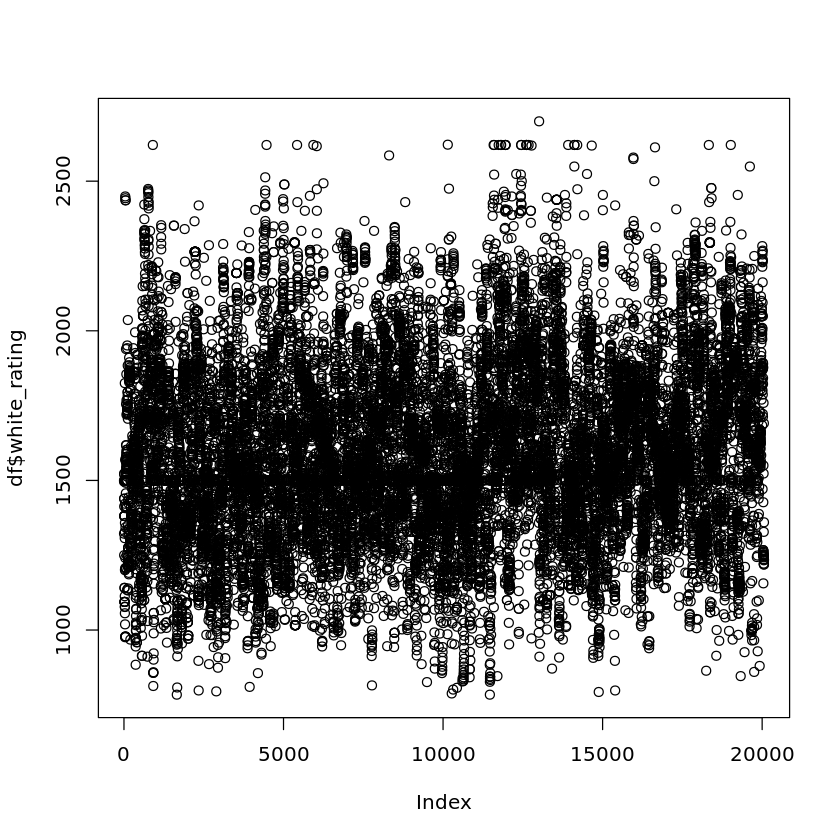

In [10]:
plot(df$white_rating)

In the plot above, we see that the y-axis is the white_rating column. The x-axis is the "index" or the row name in the dataframe.
Let's now try and plot a histogram of the white_rating.

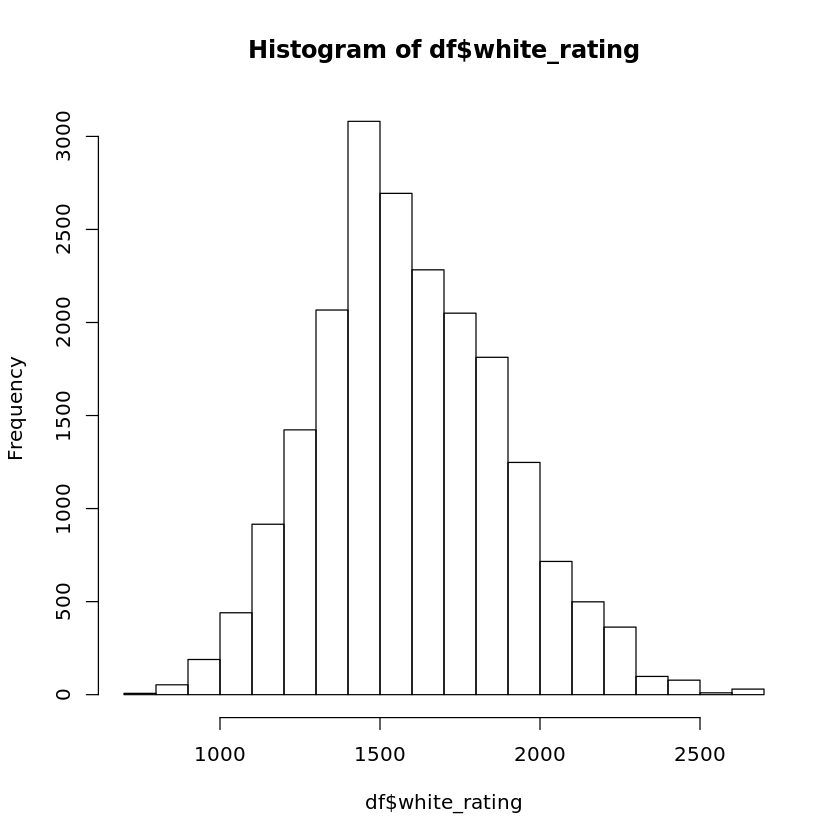

In [11]:
hist(df$white_rating)

Let's now plot white_rating vs black_rating.

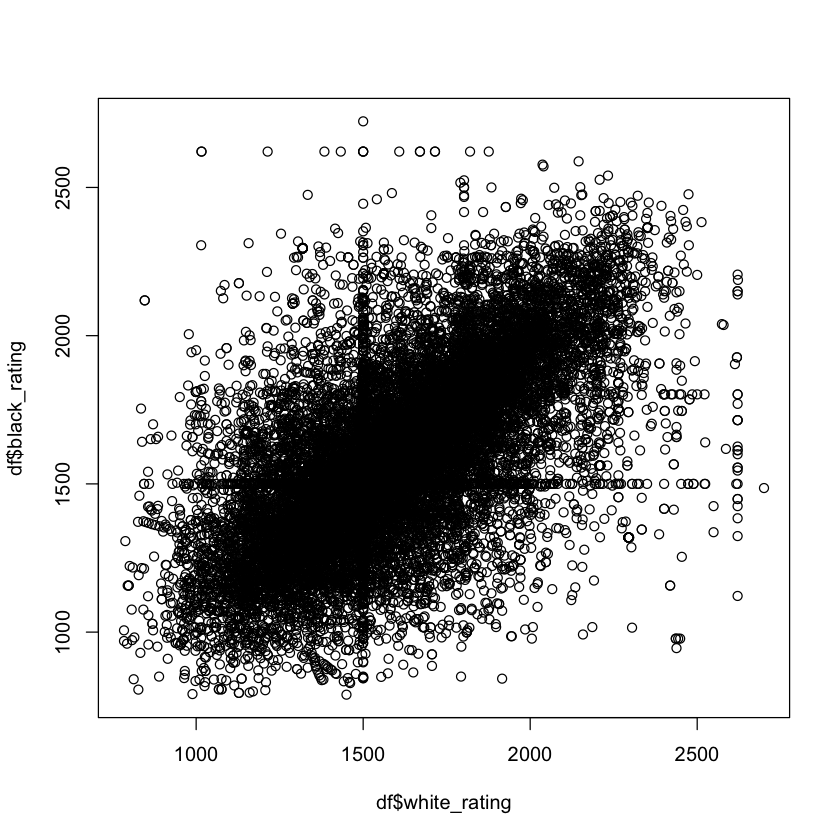

In [91]:
plot(df$white_rating, df$black_rating)

Let's try to make these filled circles using the 'pch' argument.

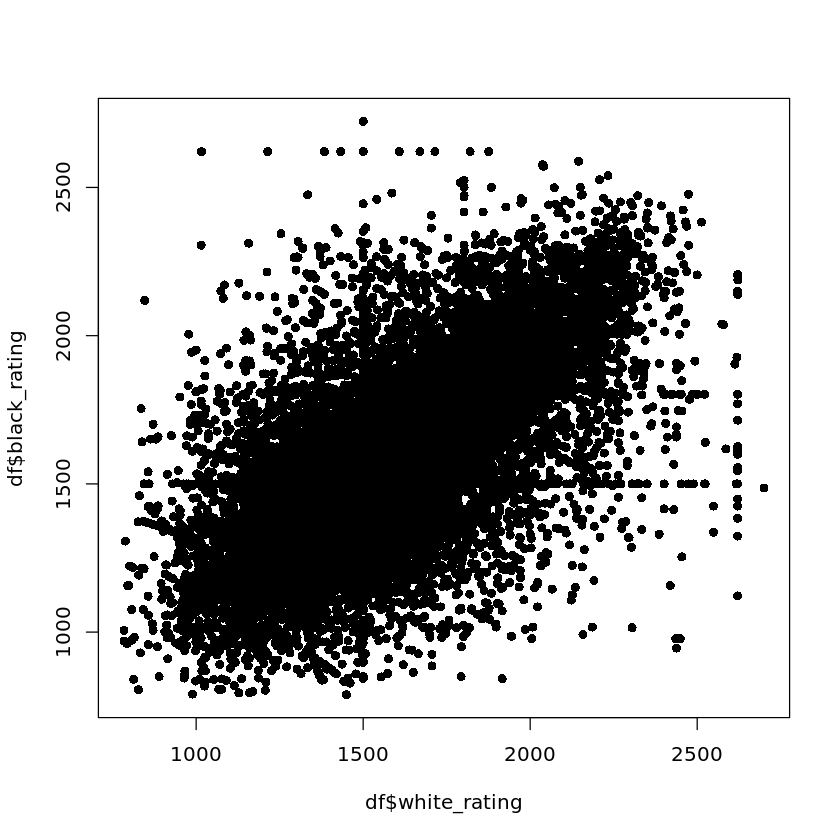

In [13]:
plot(df$white_rating, df$black_rating, pch=16)

Let's see all the 'pch' types.

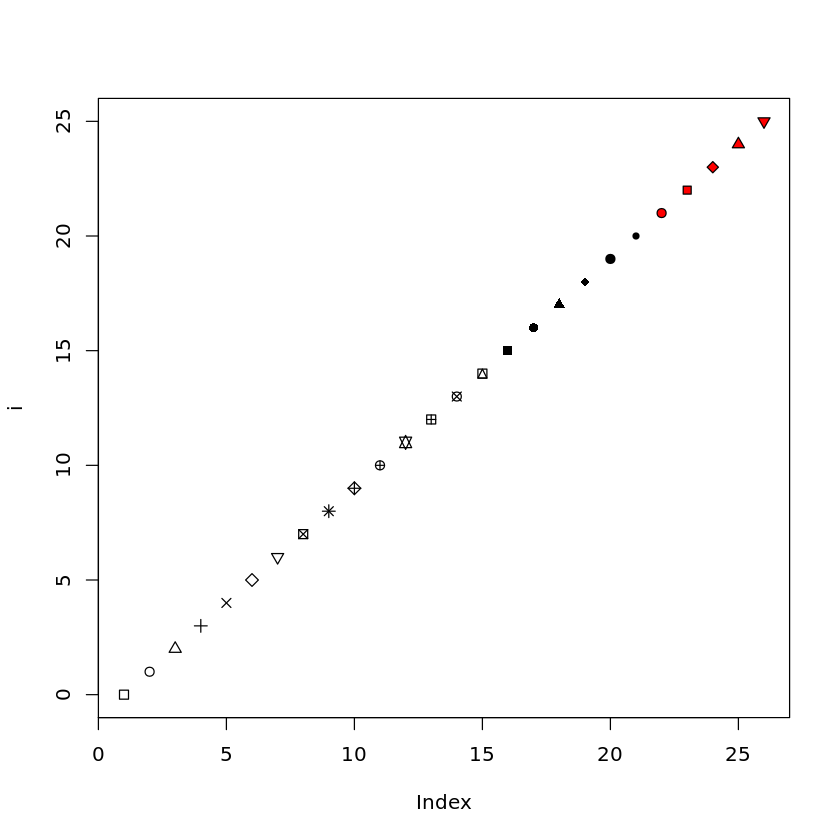

In [15]:
i <- c(0:25)
plot(i, pch = i, bg="red")

Let's try to make a little more sense of this plot by coloring the circles using another column in the dataframe.

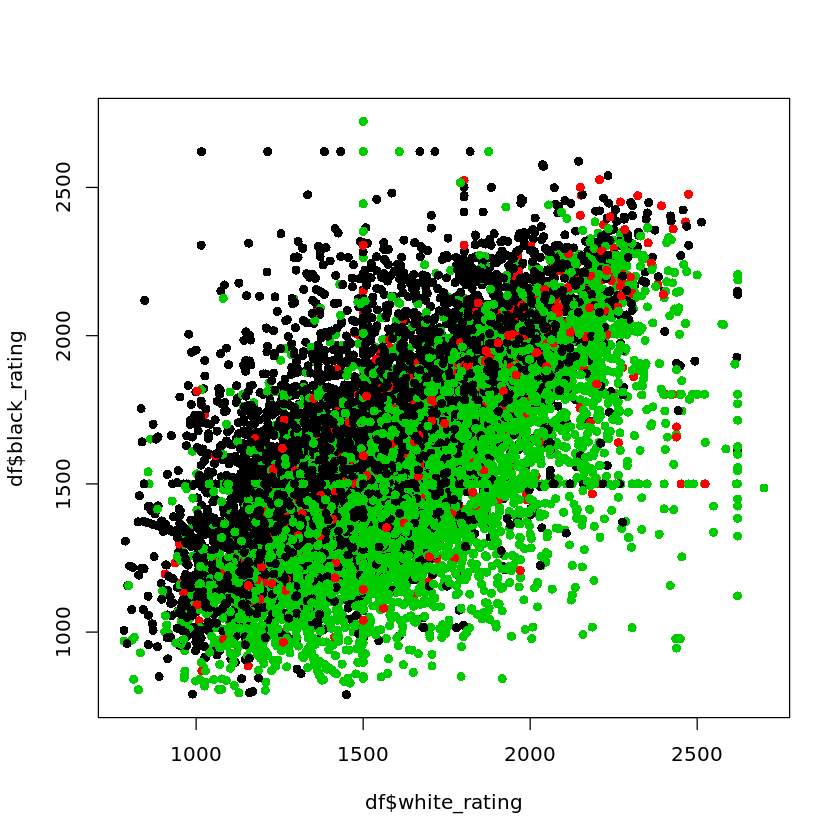

In [16]:
plot(df$white_rating, df$black_rating, col=df$winner, pch=16)

We need a legend to see what each of these values are. We will use the legend() function to display a simple legend.

In [17]:
help(legend)

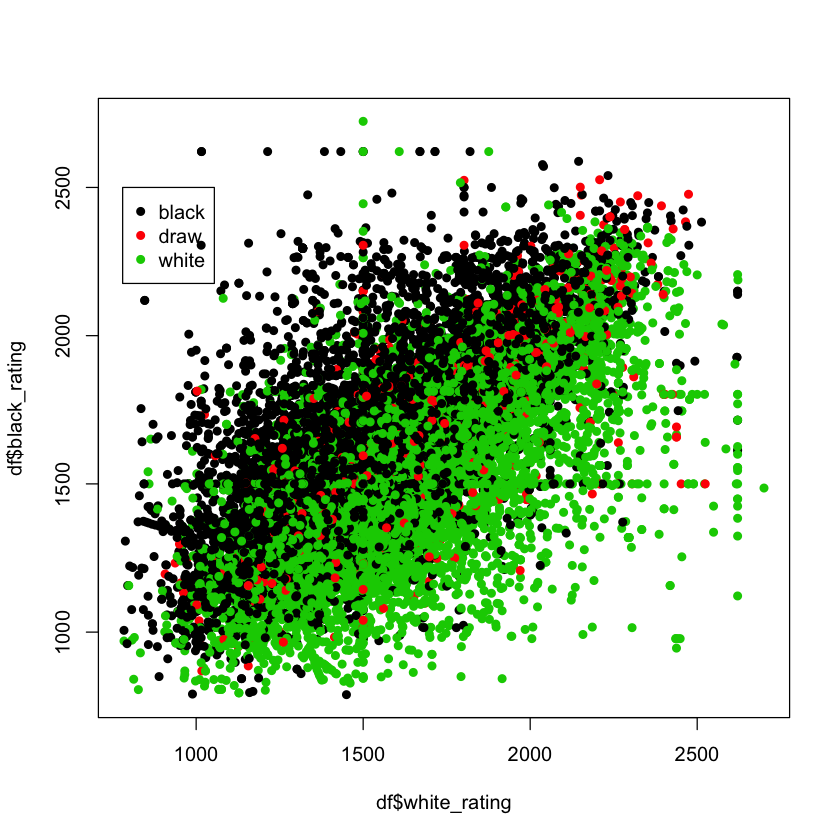

In [106]:
plot(df$white_rating, df$black_rating, col=df$winner, pch=16)
legend(x= 780, 2500, legend = levels(df$winner), col = 1:3, pch = 16)

It's too much data on one plot! Let's now subset this based on the "winner" column

In [18]:
summary(df$winner)
df.draw <- df[df$winner == "draw",]

black  draw white 
 9107   950 10001

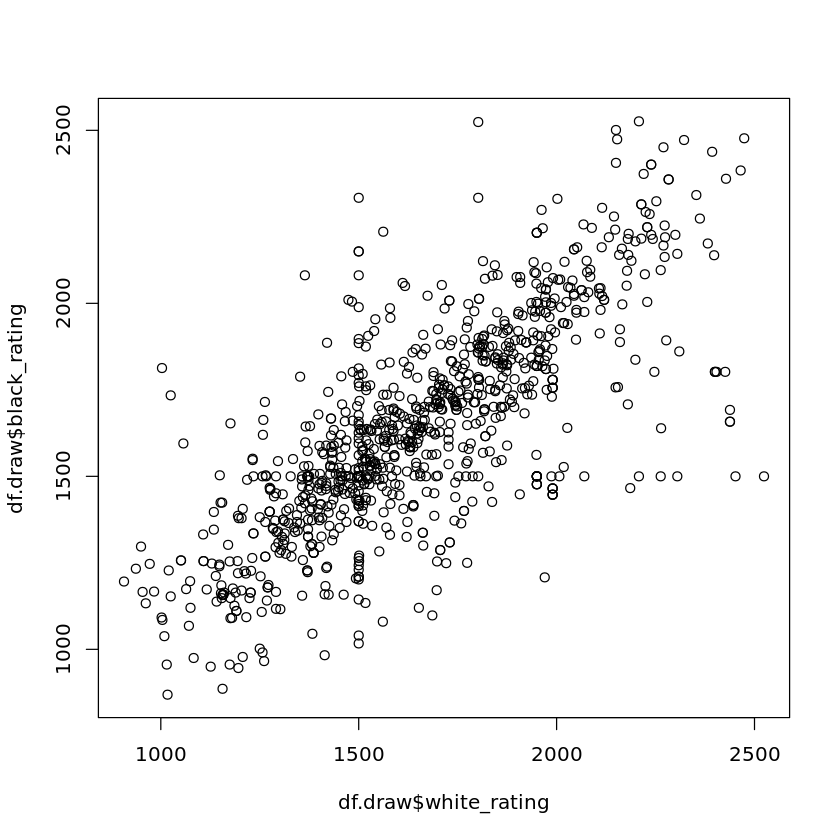

In [19]:
plot(df.draw$white_rating, df.draw$black_rating)

Let's now try and plot the number of number of games won by white or by black. 

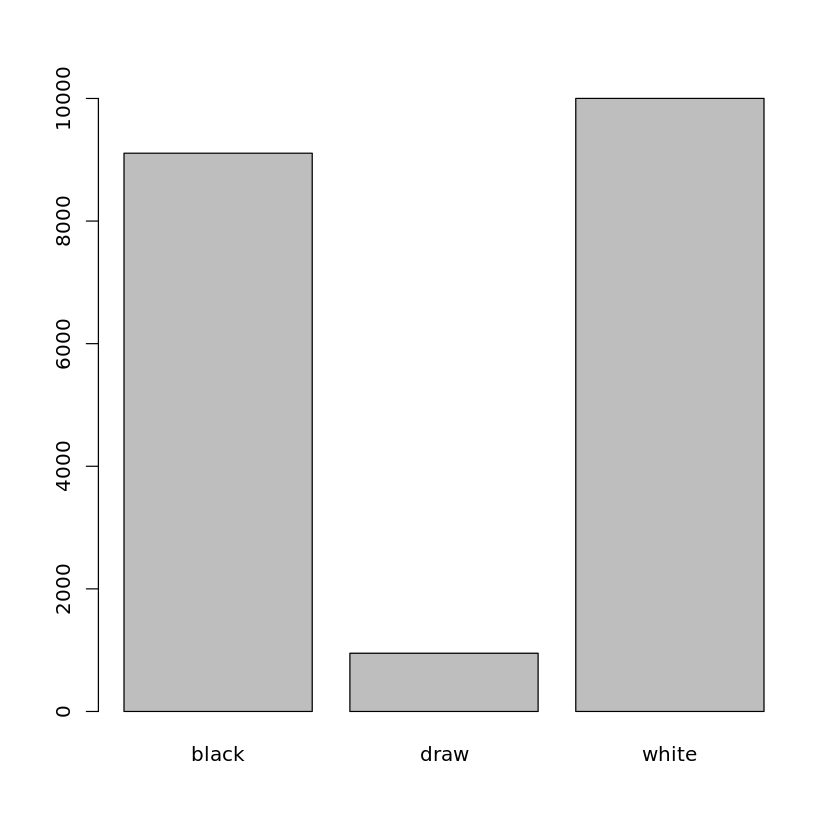

In [33]:
barplot(summary(df$winner))

In [30]:
df.black <- df[df$winner=="black",]
head(df.black)

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name
2,TRUE,16,resign,black,5+10,1322,1261,Nimzowitsch Defense: Kennedy Variation
8,FALSE,9,resign,black,15+30,1413,2108,Nimzowitsch Defense: Kennedy Variation | Linksspringer Variation
9,TRUE,66,resign,black,15+0,1439,1392,Italian Game: Schilling-Kostic Gambit
12,FALSE,38,resign,black,20+60,1381,1867,French Defense: Advance Variation | Paulsen Attack
13,FALSE,60,resign,black,5+40,1381,1936,French Defense: Knight Variation
14,FALSE,31,resign,black,8+0,1381,1607,French Defense #2


Some things to try out!
1. Plot a histogram of black_rating players.
2. Get the count of the different types of victories(columns name is "victory_status").
3. Plot the number of turns played(columns name is "turns") vs white_rating and show the legend.
4. Repeat 3 for black_rating.

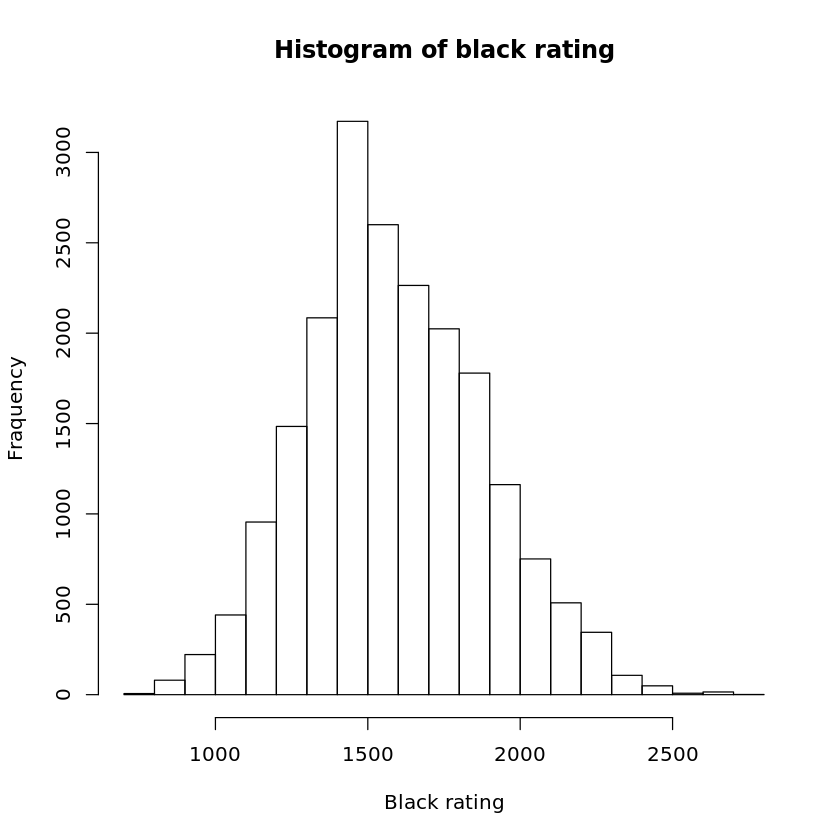

In [46]:
hist(df$black_rating,main="Histogram of black rating", xlab="Black rating", ylab="Fraquency")

In [24]:
class(df$victory_status)
summary(df$victory_status)

[1] "factor"

draw      mate outoftime    resign 
      906      6325      1680     11147

In [61]:
df$white_black <- abs(df$white_rating - df$black_rating)
df <- cbind(df, df$white_black)

The following objects are masked from mtcars (pos = 3):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 4):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 5):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 6):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 7):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 8):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 9):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 10):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

The following objects are masked from mtcars (pos = 11):

    a

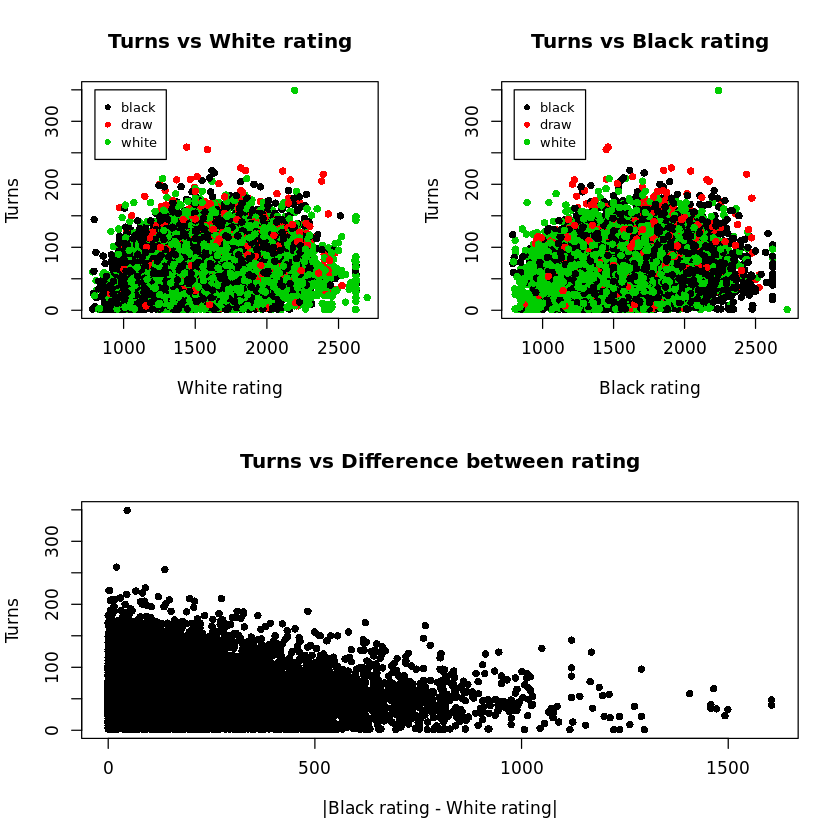

In [70]:
attach(mtcars)
layout(matrix(c(1,2,3,3), 2, 2, byrow = TRUE))
plot(df$white_rating,df$turns,col=df$winner, pch=16, main="Turns vs White rating",xlab="White rating", ylab="Turns")
legend(x=800, 350, legend=levels(df$winner), col = 1:3, pch = 16, cex = 0.8)
plot(df$black_rating,df$turns,col=df$winner, pch=16, main="Turns vs Black rating",xlab="Black rating", ylab="Turns")
legend(x=800, 350, legend=levels(df$winner), col = 1:3, pch = 16, cex = 0.8)
plot( df$white_black,df$turns, pch=16, main="Turns vs Difference between rating", xlab="|Black rating - White rating|", ylab="Turns")